a) Write a Python program to determine if a given Joint PMF corresponds to independent random variables (X,Y) or not. Take the range of values of random variables X and Y as the input and then take the Joint PMF as the input. Assume X and Y take finite number of values.

b) Plot the Joint PMF and the corresponding Joint CDF. Also, determine and plot the two Marginal PMFs and Marginal CDFs.

c) Determine the value of E[XY]. If X1=X-E[X] and Y1=Y-E[Y], determine E[X1Y1].

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Q1
ux=int(input("upper limit of X:- "))
uy=int(input("upper limit of Y:- "))
X=np.round(np.arange(0,ux),4)
Y=np.round(np.arange(0,uy),4)

#getting the values of jointpmfs
jpmf=np.zeros((ux,uy))
sum=0
for i in X:
  for j in Y:
    jointpmf=float(input(f'At x={i} and y={j}, the jointpmf='))
    if 0<=jointpmf<=1 :
        jpmf[i][j]=jointpmf
        sum+=jointpmf
    else:
      print('enter valid jointpmf between 0 to 1')
print()

#normalizing the joint pfm values to ensure that the jpmf sums up to 1
jpmf=np.round((jpmf/sum),4)

#creating a table of jointpmf
df=pd.DataFrame(jpmf, index=X, columns=Y)
print('valid joint pmf:\n', df)
print()

#calculating marginal pmf of random variables X and Y
margx=[]
margy=[]
sx=0
sy=0
for i in range(ux):
  sy=0
  for j in range(uy):
    sy+=jpmf[i][j]
  margx.append(np.round((sy),4))
for j in range(uy):
  sx=0
  for i in range(ux):
    sx+=jpmf[i][j]
  margy.append(np.round(sx,4))
print('Marginal pmf of X: ' ,margx)
print('Marginal pmf of Y: ' ,margy)

#comparing the multiplication of marginal pmfs and the joint pmf
for i in range(len(margx)):
  flag=0
  for j in range(len(margy)):
    if margx[i]*margy[j]==jpmf[i][j]:
      flag=1
      print('Given random variables are independent')
      break
  if flag==0:
      print('Given random variables are dependent')
      break

upper limit of X:- 3
upper limit of Y:- 2
At x=0 and y=0, the jointpmf=0.123
At x=0 and y=1, the jointpmf=0.234
At x=1 and y=0, the jointpmf=0.345
At x=1 and y=1, the jointpmf=0.456
At x=2 and y=0, the jointpmf=0.567
At x=2 and y=1, the jointpmf=0.678

valid joint pmf:
         0       1
0  0.0512  0.0974
1  0.1436  0.1898
2  0.2360  0.2821

Marginal pmf of X:  [0.1486, 0.3334, 0.5181]
Marginal pmf of Y:  [0.4308, 0.5693]
Given random variables are dependent


[0.0512, 0.1486, 0.1948, 0.482, 0.4308, 1.0001]


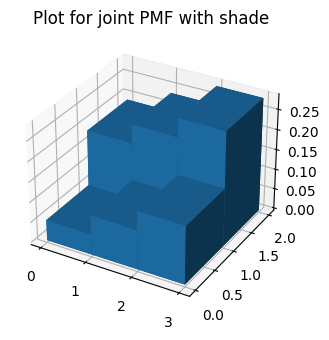

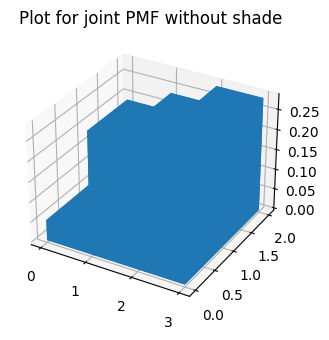

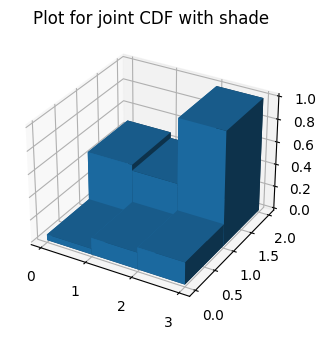

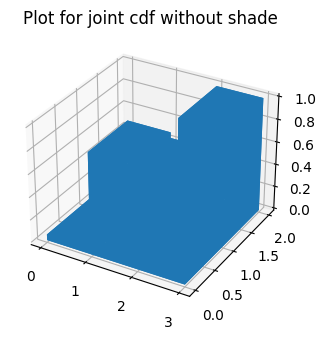

In [ ]:
#Q2
#calculating the cdf
cdf=[]
for i in range(ux):
  for j in range(uy):
    summ=0
    for k in range(i+1):
      for l in range(j+1):
        summ+=jpmf[k][l]
    cdf.append(np.round(summ,4))
print(cdf)

# plotting the joint pmf of X and Y
xaxis,yaxis=np.meshgrid(X,Y)
xaxis=xaxis.ravel()
yaxis=yaxis.ravel()
top=[]
for i in range(ux):
  for j in range(uy):
    top.append(jpmf[i][j])
depth=np.ones(len(xaxis))
width=np.ones(len(yaxis))
bottom=np.zeros((len(xaxis)))
fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(121, projection='3d')
ax1.bar3d(xaxis, yaxis, bottom, width, depth, top, shade=True)
ax1.title.set_text("Plot for joint PMF with shade")
fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(121, projection='3d')
ax1.bar3d(xaxis, yaxis, bottom, width, depth, top, shade=False)
ax1.title.set_text("Plot for joint PMF without shade")

# plotting the joint cdf of X and Y
xaxis,yaxis=np.meshgrid(X,Y)
xaxis=xaxis.ravel()
yaxis=yaxis.ravel()
bottom=[0]*len(xaxis)
depth=np.ones(len(xaxis))
width=np.ones(len(yaxis))
top=cdf
fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(121, projection='3d')
ax1.bar3d(xaxis,yaxis,bottom,depth,width,top,shade=True)
ax1.title.set_text("Plot for joint CDF with shade")
fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(121, projection='3d')
ax1.bar3d(xaxis, yaxis, bottom, width, depth, top, shade=False)
ax1.title.set_text("Plot for joint cdf without shade")


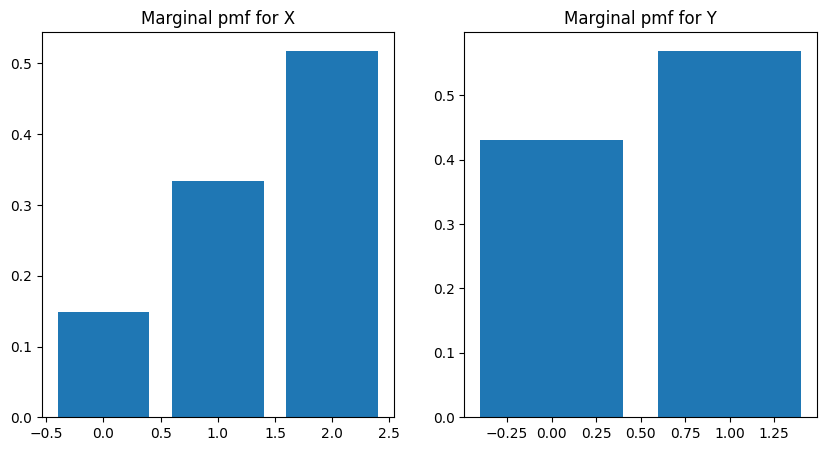

In [ ]:
#Q2
#potting marginal pmf of random variable X and Y
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.bar(X,margx)
ax1.title.set_text("Marginal pmf for X")
ax2.bar(Y,margy)
ax2.title.set_text("Marginal pmf for Y")

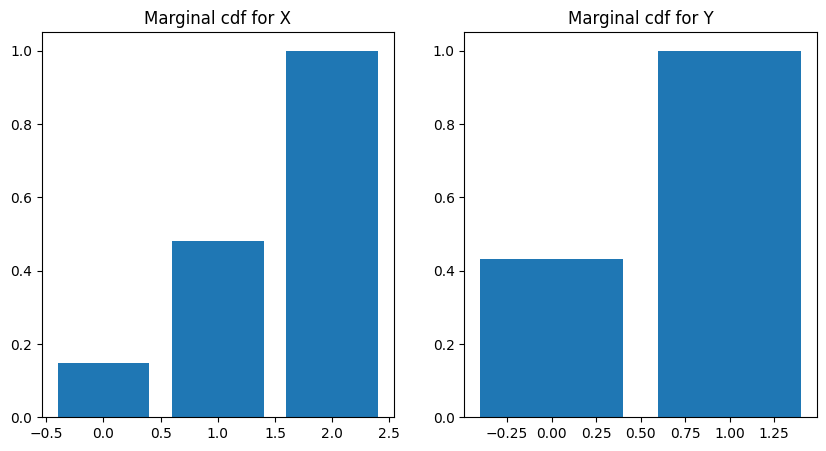

In [ ]:
#Q2
#plotting marginal cdf of random variable X and Y
x1=0
x11=[]
for i in range(len(margx)):
  x1+=margx[i]
  x11.append(x1)
y1=0
y11=[]
for j in range(len(margy)):
  y1+=margy[j]
  y11.append(y1)
marginal_cdfx=np.round(x11,4)
marginal_cdfy=np.round(y11,4)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.bar(X,marginal_cdfx)
ax1.title.set_text("Marginal cdf for X")
ax2.bar(Y,marginal_cdfy)
ax2.title.set_text("Marginal cdf for Y")

In [ ]:
#Q3
#finding the joint expectation of random variable X and Y
ex=0
for i in range(len(jpmf)):
  s=0
  for j in range(len(jpmf[i])):
      s+=j*jpmf[i][j]
  s=np.round(s,4)
  ex+=i*s
print('joint expectation of X and Y:', ex)

#finding expectation of X and Y
margex=0
for i in range(len(margx)):
  margex+=i*margx[i]
margey=0
for i in range(len(margy)):
  margey+=i*margy[i]
print('Expactation of X: ',np.round(margex,4))
print('Expaction of Y: ', np.round(margey,4))

#calculating joint expectation by finding the covariance
exx1y11=0
for i in range(len(margx)):
  sum1=0
  for j in range(len(margy)):
    sum1+=(j-margey)*jpmf[i][j]
  s=np.round(s,4)
  exx1y11+=(i-margex)*sum1
print('joint expectation by covariance:', np.round(exx1y11,4))

exx1y12=np.round(ex-margex*margey,4)
print('joint expectation by formula:', exx1y12)


joint expectation of X and Y: 0.754
Expactation of X:  1.3696
Expaction of Y:  0.5693
joint expectation by covariance: -0.0256
joint expectation by formula: -0.0257
